In [25]:
import cv2
import matplotlib.pyplot as plt

In [26]:
config_file = "C:/Users/saidh/Downloads/Object_Detection_Files/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "C:/Users/saidh/Downloads/Object_Detection_Files/frozen_inference_graph.pb"

In [27]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [28]:
classLabels = []
file_name = "C:/Users/saidh/Downloads/Object_Detection_Files/coco.names"
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [29]:
print(classLabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [30]:
model.setInputSize(320,320)
model.setInputScale(1/127.5) # 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0000020F2FF72BD0>

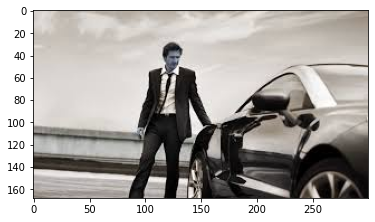

In [31]:
img =cv2.imread("C:/Users/saidh/Downloads/download.jpg")
plt.imshow(img)

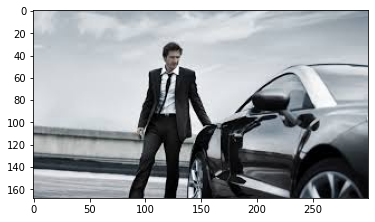

In [32]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [33]:
classIndex, confidence, bbox = model.detect(img,confThreshold=0.5)
print(classIndex)

[[1]
 [3]]


In [34]:
font_scale =3
font =cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(classIndex.flatten(),confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(225,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color=(0,255,0),thickness=3)

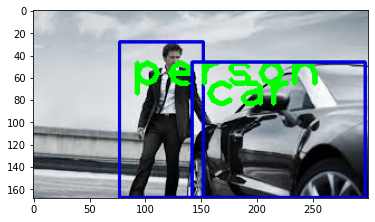

In [35]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [38]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap=cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
font_scale=1
font= cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame =cap.read()
    
    classIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(classIndex)
    if(len(classIndex)!=0):
        for ClassInd,conf,boxes in zip(classIndex.flatten(),confidence.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(225,0,0),2)
                cv2.putText(frame ,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color=(0,255,0),thickness=3)
    
    cv2.imshow("Object Detection", frame)
    
    if cv2.waitKey(2) & 0xFF ==ord('q'):
        break

cap.release()     
cv2.destroyAllWindows()
    
    

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
